# Deposit-Withdraw Times
The goal of this notebook is to investigate the distribution of time differences between deposit into and withdrawal from Tornado cash mixers, based on deanonymized "ground truth" pairs provided by the authors of the Arxiv paper.

In [1]:
from matplotlib import pyplot
import os
import pandas as pd
import numpy as np

here, we will focus on the 0.1 Eth mixer

In [2]:
# load entire history of the 0.1 eth mixer. We need this to get timestamps of a given tx by hash
history_dataframe = pd.read_csv("../data/tornadoFullHistoryMixer_0.1ETH.csv")

In [3]:
# make a dictionary mapping tx hash to time from the full history
hash_to_time = dict(zip(history_dataframe["txHash"],history_dataframe["timeStamp"]))

In [4]:
# load heuristic 1 data on the 0.1 eth mixer (situations where deposit and withdrawal were from same address)
# this is a very strong set for "ground truth" because we know they're actually the same person
# but may pose a problem if it actually contains few unique addresses

heuristic_1 = pd.read_csv("../data/heuristic1Mixer_0.1ETH.csv")

In [5]:
heuristic_1

,Unnamed: 0,depHash,withdHash,sender,receiver
0,0,0xcfa3a64a54e096eb23d808fa75f949999ec79eea2a90...,0xee6efdcb8976e3e56d61f42ff13c9dc059b1c361707c...,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,0x0039f22efb07a647557c7c5d17854cfd6d489ef3
1,1,0x12dc7b45971aa8bd26d3cddaace1ab5687ab5b1887b4...,0x5a69df04cb3d43dd562f02a566307d119ea5ee76fae4...,0xc8c30fa803833dd1fd6dbcdd91ed0b301eff87cf,0xc8c30fa803833dd1fd6dbcdd91ed0b301eff87cf
2,2,0x2ccd9930baf9e138681e6267af59647d0ecbe61be463...,0xf212c66eb680f0547a562af3a9bde23e32dd0bf26442...,0xdcbeffbecce100cce9e4b153c4e15cb885643193,0xdcbeffbecce100cce9e4b153c4e15cb885643193
3,3,0x9b188d04d5fd31e2130b022635c2d7775a975418f74c...,0x3e3c55490f5170c5959bb1fee62e63ab05b1c26f68cb...,0xd2b3968f24ec37315b25d91873c2d169693cd946,0xd2b3968f24ec37315b25d91873c2d169693cd946
4,4,0xf405a5d8264969fafbbedacc0ff059dc9994bdf84b74...,0xb244bd2384c289e4f999346ec4caf91e8e7ddc417253...,0xa328500eab25698b8b146d195f35f5b26c93aaee,0xa328500eab25698b8b146d195f35f5b26c93aaee
...,...,...,...,...,...
95,95,0xe7caed22561ec047260fdeab359d27cc3e8948cae77f...,0x4666d9eeb26fbd389184fd811ea763ae3718086ffead...,0x0091275be2a4f06cec595d147fffe71f8a531690,0x0091275be2a4f06cec595d147fffe71f8a531690
96,96,0x35792916d59363fcd0ad8f0af067d8e3c7d021287a26...,0x0e1ac871f23dec8a097e8cc35c0b3ab8b3e11d26db7c...,0x0091275be2a4f06cec595d147fffe71f8a531690,0x0091275be2a4f06cec595d147fffe71f8a531690
97,97,0xb833177f5b65b2f87f3fccad25c1c3b8458477640a7e...,0x3740cb62bd0e567e106dc51eb55a28068ae3d665f4f5...,0x4bd32e9008b36529652ef9c70b1f0f839186ee8e,0x4bd32e9008b36529652ef9c70b1f0f839186ee8e
98,98,0x194731f66ae40315519bf765657453eb4243346d8854...,0x0af9a2a4c6b76fdf8efab4b8a2168ce15677d6a5e268...,0x0091275be2a4f06cec595d147fffe71f8a531690,0x0091275be2a4f06cec595d147fffe71f8a531690


In [6]:
# we want a list of time differences between deposit and withdrawal
time_deltas = heuristic_1["withdHash"].apply(lambda x: hash_to_time[x]) - heuristic_1["depHash"].apply(lambda x: hash_to_time[x])

In [7]:
time_deltas

0     5707582
1     1582491
2      604538
3     3514995
4     7000522
       ...   
95        997
96       1729
97        397
98        292
99        853
Length: 100, dtype: int64

(array([66.,  6.,  3.,  0.,  1.,  1.,  0.,  1.,  3.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([5.60000000e+01, 7.00606600e+04, 1.40065320e+05, 2.10069980e+05,
        2.80074640e+05, 3.50079300e+05, 4.20083960e+05, 4.90088620e+05,
        5.60093280e+05, 6.30097940e+05, 7.00102600e+05, 7.70107260e+05,
        8.40111920e+05, 9.10116580e+05, 9.80121240e+05, 1.05012590e+06,
        1.12013056e+06, 1.19013522e+06, 1.26013988e+06, 1.33014454e+06,
        1.40014920e+06, 1.47015386e+06, 1.54015852e+06, 1.61016318e+06,
  

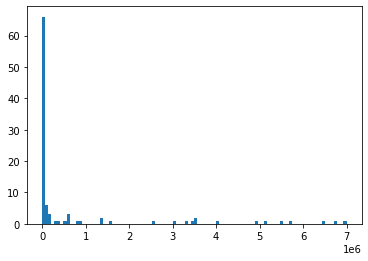

In [8]:
pyplot.hist(time_deltas, 100)

In [9]:
time_deltas.sort_values(ascending=False)

4     7000522
27    6762886
40    6458033
0     5707582
44    5475738
       ...   
36        125
63        123
77        122
67         85
60         56
Length: 100, dtype: int64

In [10]:
time_deltas

0     5707582
1     1582491
2      604538
3     3514995
4     7000522
       ...   
95        997
96       1729
97        397
98        292
99        853
Length: 100, dtype: int64

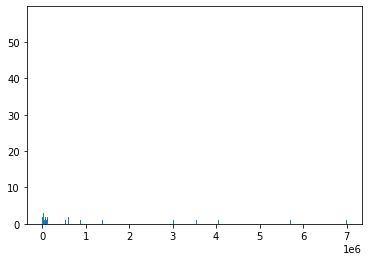

In [11]:
pyplot.hist(time_deltas.values, bins=1000)
pyplot.show()

the units of the x-axis above are seconds (based on a difference of unix timestamps), 

In [12]:
7e6/3600

1944.4444444444443

In [13]:
1e6/5/3600

55.55555555555556

In [14]:
24*3600

86400

In [15]:
time_deltas

0     5707582
1     1582491
2      604538
3     3514995
4     7000522
       ...   
95        997
96       1729
97        397
98        292
99        853
Length: 100, dtype: int64

In [16]:
# TODO: need to determine whether there is a small set of addresses are responsible for all the short time deltas
# first, create a new column in the original dataframe because we need to be able to associate addresses
# with the time deltas in question:
heuristic_1["timeDeltas"] = heuristic_1["withdHash"].apply(lambda x: hash_to_time[x]) - heuristic_1["depHash"].apply(lambda x: hash_to_time[x])


In [17]:
# now, filter for only time deltas in the first bin from the histogram with 100 bins
# this is for time delta less tha 7e4 seconds
heuristic_1[heuristic_1["timeDeltas"] <= 7e4]

,Unnamed: 0,depHash,withdHash,sender,receiver,timeDeltas
6,6,0x6e20b9ace387c4ad6966c374fc2fa51fbf46ece2aab4...,0x1b90e848a5b568be4e068b38975023853960f1ae2ce0...,0x50260fcf08808216daa93402f0704eced91ea7f7,0x50260fcf08808216daa93402f0704eced91ea7f7,3660
8,8,0x7b89245ffc3f0c2d357df443c6a0ff0b4268825c5d8b...,0x96faf9cc34369f8fe6f1e5f4b328e1970893335d5873...,0xd2a19b95a4cc1870fffcf7473c1f29f4273439b8,0xd2a19b95a4cc1870fffcf7473c1f29f4273439b8,57241
9,9,0x26bf828319e9221cdf45fd00aaf0eaa2c79f9876744f...,0x9d27da45c177dd2748f18d499664e5b6ee7ac51c6e95...,0xa2b58f70cf450d465bf153bff4c83a7427269105,0xa2b58f70cf450d465bf153bff4c83a7427269105,507
11,11,0x08f5097d3adda73966033e235147f5cd9f6aaa061df4...,0xb0de23b0ee9f83a53213a3f423024ce80919758e126e...,0x9b0c89b9e698aa887ee51af06ef63dbfbde2badc,0x9b0c89b9e698aa887ee51af06ef63dbfbde2badc,282
13,13,0x299209f19f7554de2e1fd94778585867c377fcb69fe4...,0xa4a69a0e0db809b5562353d80e3ce7c09756000108a1...,0xa5e35fdbfdd8da2377f0fe927f087d76b4e92b6f,0xa5e35fdbfdd8da2377f0fe927f087d76b4e92b6f,3783
...,...,...,...,...,...,...
95,95,0xe7caed22561ec047260fdeab359d27cc3e8948cae77f...,0x4666d9eeb26fbd389184fd811ea763ae3718086ffead...,0x0091275be2a4f06cec595d147fffe71f8a531690,0x0091275be2a4f06cec595d147fffe71f8a531690,997
96,96,0x35792916d59363fcd0ad8f0af067d8e3c7d021287a26...,0x0e1ac871f23dec8a097e8cc35c0b3ab8b3e11d26db7c...,0x0091275be2a4f06cec595d147fffe71f8a531690,0x0091275be2a4f06cec595d147fffe71f8a531690,1729
97,97,0xb833177f5b65b2f87f3fccad25c1c3b8458477640a7e...,0x3740cb62bd0e567e106dc51eb55a28068ae3d665f4f5...,0x4bd32e9008b36529652ef9c70b1f0f839186ee8e,0x4bd32e9008b36529652ef9c70b1f0f839186ee8e,397
98,98,0x194731f66ae40315519bf765657453eb4243346d8854...,0x0af9a2a4c6b76fdf8efab4b8a2168ce15677d6a5e268...,0x0091275be2a4f06cec595d147fffe71f8a531690,0x0091275be2a4f06cec595d147fffe71f8a531690,292


above, we see there are 66 rows of transactions within the first bin, which matches the height of the bar in the histogram. Who are these people, how many unique addresses are there, and what is the distribution of deposit/withdrawal pairs among them?

In [18]:
# create a dictionary of all unique addresses, and count the number of deposit-withdrawal pairs attributed to each

def addToDict(address, addr_to_num):
    # what we do for each withdraw-deposit pair
    if not address in addr_to_num:
        addr_to_num[address] = 0
    addr_to_num[address] += 1

In [19]:
less_than_7e4 = {} # key is address, value is number of withdraw-deposit pairs
heuristic_1[heuristic_1["timeDeltas"] <= 7e4]["sender"].apply(lambda x: addToDict(x, less_than_7e4))

6     None
8     None
9     None
11    None
13    None
      ... 
95    None
96    None
97    None
98    None
99    None
Name: sender, Length: 66, dtype: object

In [20]:
less_than_7e4

{'0x50260fcf08808216daa93402f0704eced91ea7f7': 1,
 '0xd2a19b95a4cc1870fffcf7473c1f29f4273439b8': 1,
 '0xa2b58f70cf450d465bf153bff4c83a7427269105': 1,
 '0x9b0c89b9e698aa887ee51af06ef63dbfbde2badc': 1,
 '0xa5e35fdbfdd8da2377f0fe927f087d76b4e92b6f': 2,
 '0xd495826cabb093e7dca498d1a98e4dc55e0c29db': 1,
 '0x968aab417f159019515ac1e46e0aaf62ac2151b8': 1,
 '0x6f9bb7e454f5b3eb2310343f0e99269dc2bb8a1d': 1,
 '0x55a46968d41c967e578dbd162eba44c3e43ffaca': 1,
 '0x42a2f2c3be4f825758039ef254ae422a7a9c8774': 1,
 '0x80658e3657882cfa73fff0eb20c92aa5e948230c': 1,
 '0x40f41c762763436d73de1bafb11729c36ad32a54': 1,
 '0xe1846df99fdd930fe5585364b1e2eaa954b7d653': 1,
 '0x35c6432ebc042f0ec6490a6ef5f40423fd06019f': 1,
 '0x36653b3741d35ad8260e99ea456711f65e542f28': 1,
 '0x0b157ac0a65319b0a18aa46b0b0d4497e1074456': 1,
 '0x2ff7913d16bbd79136b015034cb54053607ac58b': 2,
 '0x8589427373d6d84e98730d7795d8f6f8731fda16': 1,
 '0x054d4e90b51b5869f9372892ed4e9cb69655182d': 1,
 '0x1ea456cb5f130d17179dc506df8cb0c754e9c902': 1,


In [21]:
len(less_than_7e4)

60

In [22]:
total_unique = {}
heuristic_1["sender"].apply(lambda x: addToDict(x, total_unique))
len(total_unique)

89

Therefore, we can see there are 60 unique addresses that sent within 7e4 seconds. This is out of 89 total unique addresses, so it is not true that a large number of the transactions made within the short time were done by the same small set of addresses. This means that the data we have seem to be good for further statistical analysis without being skewed by the small number of accounts that make a lot of deposits and withdrawals in a short time. Now, the question is: how are these time deltas distributed statistically?

First, I know that the distribution cannot actually be normal, since the time delta cannot be less than 0. From the 1000-bin histogram it seems that there is no lower bound besides that 0, but that the peak is not there. Therefore, I will start by assuming a one-sided truncated normal distribution. The first thing to do would be to calculate the sample standard deviation and mean to simulate this distribution, and then perform a goodness-of-fit test to see whether that approximation is really any good. If so, I can just take the mean and standard deviation and plug them into the formula that I wrote up.

In [23]:
# mean time delta
heuristic_1["timeDeltas"].mean()

754930.09

In [24]:
# sample standard deviation of time delta
heuristic_1["timeDeltas"].std()

1688859.0097746442

now, to calculate the probability density function of the truncated normal distribution (truncated at 0), I need to figure out the cumulative density function at the lower bound. To do this, I will calculate the z-value of the point of truncation (currently 0) after standardizing the distribution:

In [25]:
# z-value:
-heuristic_1["timeDeltas"].mean()/heuristic_1["timeDeltas"].std()

-0.4470059878478165

The cumulative density function of -0.447 is 0.327

Therefore, the probability density function of the truncated normal distribution (according to the [wiki page](https://en.wikipedia.org/wiki/Truncated_normal_distribution)) is as follows:

In [26]:
# a helper function
def pdf_normal(delta_t, mu, sigma):
    # the probability density function of the normal distribution, assuming a normal distribution
    # it may turn out that this is not a normal distribution,
    # in which case this function should be fixed.
    return 1/(sigma*np.sqrt(2*np.pi))*np.e**(-1/2*((delta_t - mu)/sigma)**2)

def pdf(delta_t):
    # the probability density function of the the calculated normal distribution truncated at 0
    # the mean and std deviation are as calculated above
    mu = 754930.09
    sigma = 1688859.0097746444
    1/sigma*pdf_normal(delta_t, mu, sigma)/(1-0.327)

First, let's perform a chi-squared goodness-of-fit test 

now, we want to perform a Kolmogorov-Smirnov test for the goodness of fit of the truncated normal distribution with probability distribution function `pdf` as above. For this, we will need `scipy`. Actually, it turns out that we need the cdf of the thing for the K-S test. Rather than trying to use the above function and performing a numerical integration of it, I will just use scipy's truncated normal distribution.

In [27]:
from scipy.stats import kstest, truncnorm

In [28]:
kstest(heuristic_1["timeDeltas"], lambda x: truncnorm.cdf(x, 0, np.inf, loc=754930.09, scale=1688859.0097746444))

KstestResult(statistic=0.81, pvalue=8.619864241095376e-72)

the p-value is on the order of 1e-72, which means either that this truncated normal distribution is a horrible approximation for the real time deltas, or that I ran the test wrong.

To test whether or nor I ran the test wrong, let's do the same thing to test the goodness of fit of the same truncated normal distribution to another 100 samples from the same distribution:

In [29]:
kstest(truncnorm.rvs(0, np.inf, loc=754930.09, scale=1688859.0097746444, size=100), 
       lambda x: truncnorm.cdf(x, 0, np.inf, loc=754930.09, scale=1688859.0097746444))

KstestResult(statistic=0.07034979310556033, pvalue=0.678777369827167)

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11., 39., 50., 39.,
         27., 28., 34., 27., 37., 27., 33., 32., 32., 35., 28., 26., 31.,
         26., 25., 35., 18., 24., 28., 21., 14., 23., 22., 13., 18., 19.,
         18., 10., 10., 14.,  5., 13.,  9.,  7.,  3.,  5.,  9.,  6., 10.,
         10.,  5.,  3.,  7.,  1.,  3.,  2.,  4.,  2.,  3.,  3.,  0.,  1.,
          3.,  2.,  1.,  2.,  3.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [68.,  4.,  3.,  0.,  1.,  1.,  1.,  3.,  0.,  0.,  1.,  1.,  0.,
          0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
          1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
          1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.

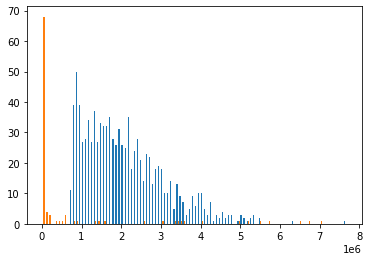

In [30]:
pyplot.hist([truncnorm.rvs(0, np.inf, loc=754930.09, scale=1688859.0097746444, size=1000),
            heuristic_1["timeDeltas"]], 100)

Indeed, it seems as though the truncated normal distribution is a horrible approximation of the time delta distribution. I need to find something better.

## Finding the best distribution

To find the best distribution, I will use the `fitter` python module:

In [44]:
import fitter

In [51]:
fitter.fitter?

NameError: name 'logger' is not defined

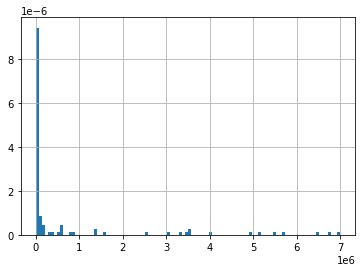

In [43]:
f = Fitter(heuristic_1["timeDeltas"].values, distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [39]:
import scipy.stats

In [40]:
scipy.stats.alpha.fit(heuristic_1["timeDeltas"].values)

(0.4645900783722752, -734.471777904726, 1820.5316335731495)

In [64]:
stats.alpha.fit?

In [54]:
# the fitter library is being screwy, so I'll put a bit of effort into debugging it
import inspect

print(inspect.getsource(fitter.fitter))

# -*- python -*-
# -*- coding: utf-8 -*-
#
#  This file is part of the fitter software
#
#  Copyright (c) 2014
#
#  File author(s): Thomas Cokelaer <cokelaer@gmail.com>
#
#  Distributed under the GPLv3 License.
#  See accompanying file LICENSE.txt or copy at
#      http://www.gnu.org/licenses/gpl-3.0.html
#
#  source: https://github.com/cokelaer/fitter
#  Documentation: http://packages.python.org/fitter
#  Package: http://pypi.python.org/fitter
#
##############################################################################
"""main module of the fitter package

.. sectionauthor:: Thomas Cokelaer, Aug 2014-2020

"""
import sys
import threading
from datetime import datetime
import logging

import scipy.stats
import numpy as np
import pylab
import pandas as pd
from scipy.stats import entropy as kl_div


logging.getLogger(__name__)

__all__ = ['get_common_distributions', 'get_distributions', 'Fitter']


def get_distributions():
    distributions = []
    for this in dir(scipy.stats):
     

In [68]:
from distfit import distfit

In [78]:
dist = distfit(todf=True, distr='full')
results = dist.fit_transform(time_deltas)

[distfit] >fit..
[distfit] >transform..
[distfit] >[alpha          ] [0.07 sec] [RSS: 0.0000000] [loc=-734.472 scale=1820.532]
[distfit] >[anglit         ] [0.02 sec] [RSS: 0.0000000] [loc=1109196.801 scale=3822848.998]
[distfit] >[arcsine        ] [0.03 sec] [RSS: 0.0000000] [loc=56.000 scale=7230836.389]
[distfit] >[beta           ] [0.08 sec] [RSS: 0.0000000] [loc=56.000 scale=10496633.291]
[distfit] >[betaprime      ] [0.07 sec] [RSS: 0.0000000] [loc=-0.344 scale=0.695]
[distfit] >[bradford       ] [0.06 sec] [RSS: 0.0000000] [loc=55.845 scale=21114961.111]
[distfit] >[burr           ] [0.18 sec] [RSS: 0.0000000] [loc=-0.853 scale=0.002]
[distfit] >[cauchy         ] [0.01 sec] [RSS: 0.0000000] [loc=766.717 scale=2453.664]
[distfit] >[chi            ] [0.05 sec] [RSS: 0.0000000] [loc=56.000 scale=2250146.565]
[distfit] >[chi2           ] [0.06 sec] [RSS: 0.0000000] [loc=56.000 scale=3122180.663]
[distfit] >[cosine         ] [0.01 sec] [RSS: 0.0000000] [loc=1434362.698 scale=1888443.

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\ngilbrat\nloc=-43459.5, scale=136745'}, xlabel='Values', ylabel='Frequency'>)

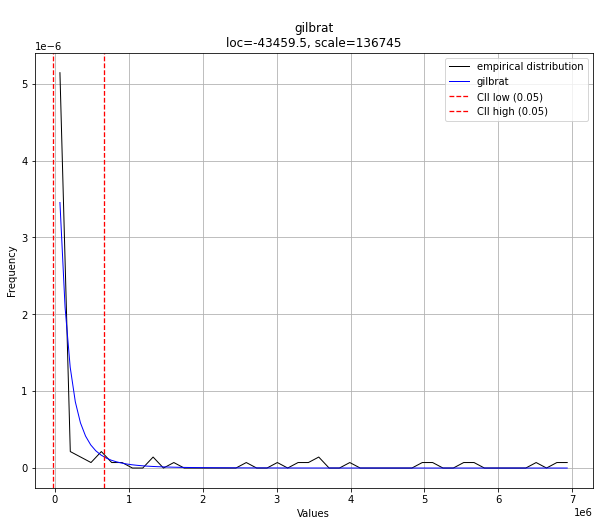

In [79]:
dist.plot()

In [80]:
results

{'model': {'distr': <scipy.stats._continuous_distns.gilbrat_gen at 0x7fd706861370>,
  'stats': 'RSS',
  'params': (-43459.54200307357, 136745.123982681),
  'name': 'gilbrat',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fd6fca13eb0>,
  'score': 4.378248725611573e-12,
  'loc': -43459.54200307357,
  'scale': 136745.123982681,
  'arg': (),
  'CII_min_alpha': -17062.15158988685,
  'CII_max_alpha': 664914.6056057616},
 'summary':             distr                                              score  LLE  \
 0         gilbrat                                                0.0  NaN   
 1     halfgennorm                                                0.0  NaN   
 2   recipinvgauss                                                0.0  NaN   
 3            wald                                                0.0  NaN   
 4      gausshyper                                                0.0  NaN   
 ..            ...                                                ...  ...   
 75      

In [83]:
pd.set_option('display.max_rows', 90)

In [84]:
dist.summary

,distr,score,LLE,loc,scale,arg
0,gilbrat,0.0,NaN,-43459.542003,136745.123983,()
1,halfgennorm,0.0,NaN,56.0,23.55453,"(0.21341969190646715,)"
2,recipinvgauss,0.0,NaN,56.0,707939.178718,"(4112620.8160994854,)"
3,wald,0.0,NaN,-150732.589374,554439.726925,()
4,gausshyper,0.0,NaN,56.0,9068374.659499,"(0.1963504538042452, 1.9195352662150458, 1.781..."
5,exponweib,0.0,NaN,56.0,4840.701268,"(1.905415077881837, 0.20666061687806034)"
6,gamma,0.0,NaN,56.0,2772398.980329,"(0.19496182558323322,)"
7,chi,0.0,NaN,56.0,2250146.564716,"(0.20114406001631915,)"
8,pearson3,0.0,NaN,433982.477237,1107186.712889,"(5.103107420130836,)"
9,exponpow,0.0,NaN,56.0,1284103.200301,"(0.6253510584700557,)"
